In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv("E:\datasets\cars_train.csv")
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [54]:
cars1=cars.copy()
make_test = cars1["Name"].str.split(" ", expand = True)

In [55]:
cars1["Manufacturer"] = make_test[0]

Text(0,0.5,'Count of cars')

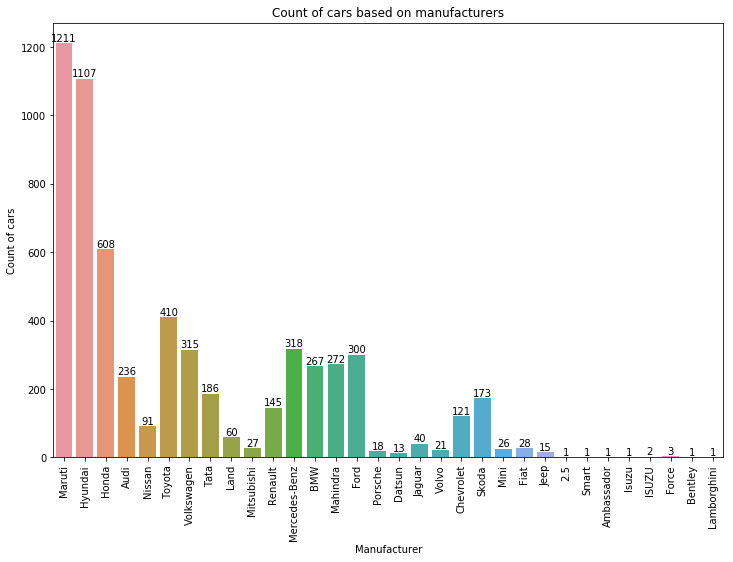

In [56]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = cars1)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [57]:
cars1.drop("Location", axis = 1, inplace = True)

In [58]:
mileage_train = cars1["Mileage"].str.split(" ", expand = True)

cars1["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')

In [59]:
print((cars1["Mileage"].isnull()))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5989    False
5990    False
5991    False
5992    False
5993    False
5994    False
5995    False
5996    False
5997    False
5998    False
5999    False
6000    False
6001    False
6002    False
6003    False
6004    False
6005    False
6006    False
6007    False
6008    False
6009    False
6010    False
6011    False
6012    False
6013    False
6014    False
6015    False
6016    False
6017    False
6018    False
Name: Mileage, Length: 6019, dtype: bool


In [84]:
cars1["Mileage"].fillna(cars1["Mileage"].astype("float64").mean(), inplace = True)

In [88]:
cc_train = cars1["Engine"].str.split(" ", expand = True)

cars1["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')


bhp_train = cars1["Power"].str.split(" ", expand = True)
cars1["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [62]:
cars1["Engine"].fillna(cars1["Engine"].astype("float64").mean(), inplace = True)


cars1["Power"].fillna(cars1["Power"].astype("float64").mean(), inplace = True)


cars1["Seats"].fillna(cars1["Seats"].astype("float64").mean(), inplace = True)

In [63]:
cars1.drop("Name", axis = 1, inplace = True)

In [64]:
categorical_cols = cars1.select_dtypes(include = ['object'])
categorical_cols.head()

,Fuel_Type,Transmission,Owner_Type,Manufacturer
0,CNG,Manual,First,Maruti
1,Diesel,Manual,First,Hyundai
2,Petrol,Manual,First,Honda
3,Diesel,Manual,First,Maruti
4,Diesel,Automatic,Second,Audi


In [65]:
dummies = pd.get_dummies(categorical_cols, drop_first = True)
dummies.head()

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Manufacturer_Ambassador,Manufacturer_Audi,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data1 = pd.concat([data, dummies], axis =1)
data1 = data1.drop(['Fuel_Type', 'Transmission', 'Owner_Type', 'Manufacturer'], axis =1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 46 columns):
Year                          6019 non-null int64
Kilometers_Driven             6019 non-null int64
Mileage                       6019 non-null float64
Engine                        6019 non-null float64
Power                         6019 non-null float64
Seats                         6019 non-null float64
Price                         6019 non-null float64
Fuel_Type_Diesel              6019 non-null uint8
Fuel_Type_Electric            6019 non-null uint8
Fuel_Type_LPG                 6019 non-null uint8
Fuel_Type_Petrol              6019 non-null uint8
Transmission_Manual           6019 non-null uint8
Owner_Type_Fourth & Above     6019 non-null uint8
Owner_Type_Second             6019 non-null uint8
Owner_Type_Third              6019 non-null uint8
Manufacturer_Ambassador       6019 non-null uint8
Manufacturer_Audi             6019 non-null uint8
Manufacturer_BMW              601

In [67]:
data_numeric = data.select_dtypes(include =['int64','float64'])
data_numeric.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,10,72000,26.60,998.0,58.16,5.0,1.75
1,5,41000,19.67,1582.0,126.20,5.0,12.50
2,9,46000,18.20,1199.0,88.70,5.0,4.50
3,8,87000,20.77,1248.0,88.76,7.0,6.00
4,7,40670,15.20,1968.0,140.80,5.0,17.74


In [68]:
data_numeric.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [69]:
col_list =['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [71]:
X_train, X_test, y_train,y_test = train_test_split(data1.loc[:, data1.columns!='Price' ], data1['Price'] , test_size = 0.3, random_state = 0)

In [72]:
scaler = StandardScaler()
data1[col_list]=scaler.fit_transform(data1[col_list])

In [73]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
y_pred = linearRegression.predict(X_test)

In [75]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5150,7.25,9.883503
2164,4.25,5.077619
1136,3.90,4.881579
5641,8.41,14.401374
1515,13.48,14.183565
1675,4.25,3.614452
2268,5.35,7.277118
143,1.67,1.484758
4646,3.75,3.680350
5008,3.25,3.676896


In [76]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [77]:
dd = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
dd

,Actual,Predicted
5150,7.25,7.902200
2164,4.25,3.243700
1136,3.90,4.088600
5641,8.41,11.151000
1515,13.48,14.105400
1675,4.25,3.724467
2268,5.35,6.344000
143,1.67,2.347200
4646,3.75,4.243700
5008,3.25,4.582600


In [ ]:

THEREFORE RANDOM FOREST MODEL HAS BEST PREDICTIVE VALUE